# CS 240 - Exploratory Data Analysis

### Güzide Nur Demir
### 215150432





#### Section 1

In this project, i have used NBA players and coaches from the dataset. I'm trying to answer whether there is negative relationship between number of lost games for coaches and number of assists by the players in same year or not.

#### Section 2

In [1]:
import pandas as pd
coaches_data=pd.read_csv("basketball_coaches.csv") #reading NBA coaches which is my first data set
coaches_data.head(10)

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,johnsne01,1961,PGR,ABL1,1,41.0,40.0,0.0,1.0
1,auerbre01,1946,WSC,NBA,1,49.0,11.0,2.0,4.0
2,birchpa01,1946,PIT,NBA,1,15.0,45.0,0.0,0.0
3,cliffro01,1946,CLR,NBA,2,13.0,10.0,1.0,2.0
4,cohalne01,1946,NYK,NBA,1,33.0,27.0,2.0,3.0
5,curtigl01,1946,DTF,NBA,1,12.0,22.0,0.0,0.0
6,dehnere01,1946,CLR,NBA,1,17.0,20.0,0.0,0.0
7,fitzgdi01,1946,TRH,NBA,1,2.0,1.0,0.0,0.0
8,gottled01,1946,PHW,NBA,1,35.0,25.0,8.0,2.0
9,haymale01,1946,TRH,NBA,3,0.0,1.0,0.0,0.0


In [40]:
players_data=pd.read_csv("basketball_players.csv") #reading NBA players which is my second data set
players_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN
5,baumhfr01,1946,1,CLR,NBA,45,0,0,631,0,...,0,0,0,0,0,0,0,0,0,NaN
6,beckemo01,1946,1,PIT,NBA,17,0,0,108,0,...,0,0,0,0,0,0,0,0,0,NaN
7,beckemo01,1946,2,BOS,NBA,6,0,0,13,0,...,0,0,0,0,0,0,0,0,0,NaN
8,beckemo01,1946,3,DTF,NBA,20,0,0,41,0,...,0,0,0,0,0,0,0,0,0,NaN
9,beendha01,1946,1,PRO,NBA,58,0,0,713,0,...,0,0,0,0,0,0,0,0,0,NaN


I select specific columns from players and coaches datasets. I want to use them in hypothesis 

In [3]:
coaches_data=coaches_data[["coachID", "year", "tmID", "lost"]]
coaches_data.head(10)

,coachID,year,tmID,lost
0,johnsne01,1961,PGR,40.0
1,auerbre01,1946,WSC,11.0
2,birchpa01,1946,PIT,45.0
3,cliffro01,1946,CLR,10.0
4,cohalne01,1946,NYK,27.0
5,curtigl01,1946,DTF,22.0
6,dehnere01,1946,CLR,20.0
7,fitzgdi01,1946,TRH,1.0
8,gottled01,1946,PHW,25.0
9,haymale01,1946,TRH,1.0


In [4]:
players_data=players_data[["playerID", "year", "tmID",  "assists"]]
players_data.head(10)

,playerID,year,tmID,assists
0,abramjo01,1946,PIT,35
1,aubucch01,1946,DTF,20
2,bakerno01,1946,CHS,0
3,baltihe01,1946,STB,16
4,barrjo01,1946,STB,54
5,baumhfr01,1946,CLR,54
6,beckemo01,1946,PIT,14
7,beckemo01,1946,BOS,1
8,beckemo01,1946,DTF,15
9,beendha01,1946,PRO,37


In [41]:
#finding avarage of assists by groupping year and team id
assists_data = players_data.groupby(["year", "tmID"]).agg({"tmID": "min", "year": "min", "assists": "mean"})
assists_data.head(15) 

tmID  year  assists
year tmID                    
1937 AFS   AFS  1937      0.0
     AGW   AGW  1937      0.0
     BFB   BFB  1937      0.0
     CNC   CNC  1937      0.0
     COL   COL  1937      0.0
     DYM   DYM  1937      0.0
     FWE   FWE  1937      0.0
     INK   INK  1937      0.0
     KNK   KNK  1937      0.0
     OSH   OSH  1937      0.0
     PGP   PGP  1937      0.0
     WAR   WAR  1937      0.0
     WHT   WHT  1937      0.0
1938 AFS   AFS  1938      0.0
     AGW   AGW  1938      0.0

In [6]:
assists_data.describe()["assists"] #information about dataframe of assists

count    1536.000000
mean      109.375715
std        45.103182
min         0.000000
25%        91.553258
50%       115.882353
75%       139.425000
max       222.727273
Name: assists, dtype: float64

In [7]:
assists_data.shape #information about dataframe of assists

(1536, 3)

In [8]:
coaches_data.describe()["lost"] #information about dataframe of coaches

count    1680.000000
mean       33.286905
std        14.715967
min         0.000000
25%        23.000000
50%        33.000000
75%        43.000000
max        71.000000
Name: lost, dtype: float64

In [9]:
coaches_data.shape #information about dataframe of coaches

(1689, 4)

#### Section 3

In [10]:
#merging dataframes with multiple columns by inner method that considers intersections
merged_data = pd.merge(coaches_data, assists_data, how="inner", left_on=["year", "tmID"], right_on=["year", "tmID"])
merged_data.head(10)

,coachID,year,tmID,lost,assists
0,johnsne01,1961,PGR,40.0,59.700000
1,auerbre01,1946,WSC,11.0,27.000000
2,birchpa01,1946,PIT,45.0,16.000000
3,cliffro01,1946,CLR,10.0,27.444444
4,dehnere01,1946,CLR,20.0,27.444444
5,cohalne01,1946,NYK,27.0,22.850000
6,curtigl01,1946,DTF,22.0,32.133333
7,sachsph01,1946,DTF,18.0,32.133333
8,fitzgdi01,1946,TRH,1.0,23.100000
9,haymale01,1946,TRH,1.0,23.100000


In [11]:
merged_data.shape #information about dataframe of merged set

(1689, 5)

In this part, there are some visuals to show my data

In [12]:
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


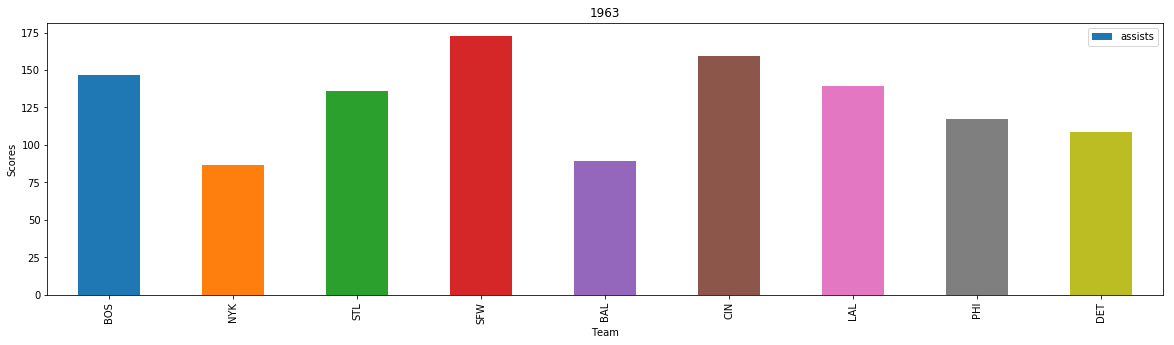

In [13]:
#drawing bar figure for teams and assists which are scored in 1963
pylab.rcParams["figure.figsize"] = (20, 5)
merged_data[merged_data.year == 1963].plot(kind="bar", x="tmID", y="assists")
plt.title("1963")
plt.xlabel("Team")
plt.ylabel("Scores")
plt.show()

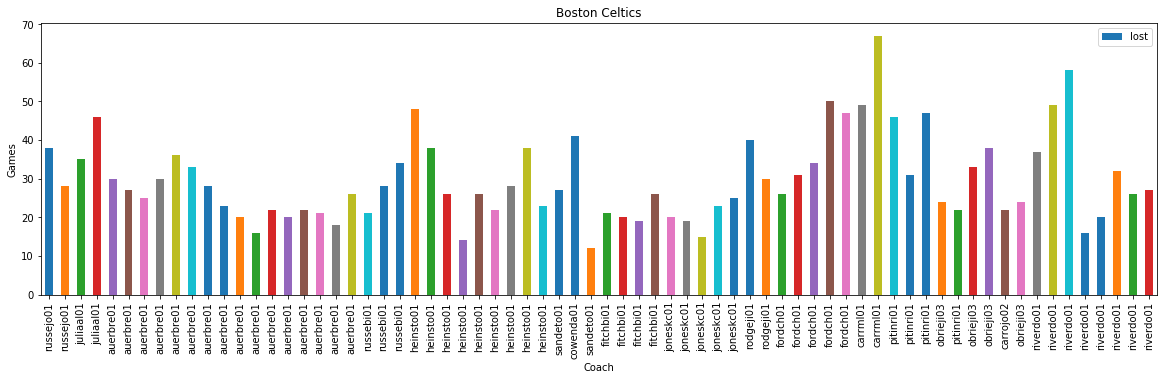

In [48]:
#drawing bar that shows coaches and games which are lost for Boston Celtics
pylab.rcParams["figure.figsize"] = (20, 5)
merged_data[merged_data.tmID == "BOS"].plot(kind="bar", x="coachID", y="lost")
plt.title("Boston Celtics")
plt.xlabel("Coach")
plt.ylabel("Games")
plt.show()

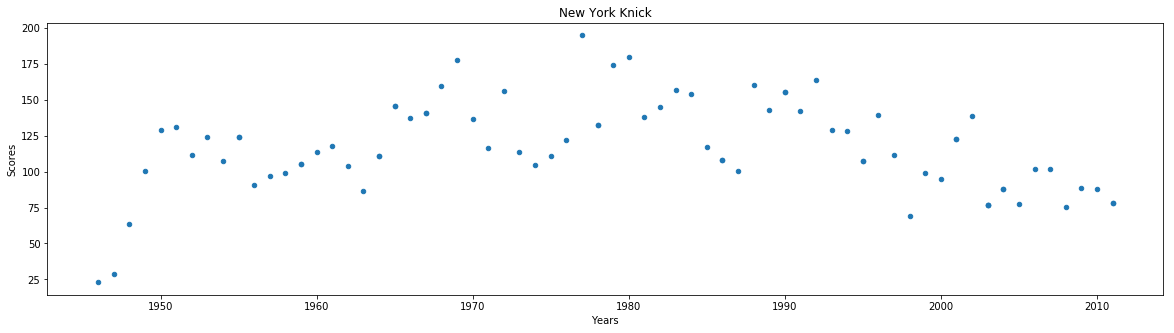

In [39]:
#drawing bar that shows assists for New York Knick scored per year
pylab.rcParams["figure.figsize"] = (20, 5)
merged_data[merged_data.tmID == "NYK"].plot(kind="scatter", x="year", y="assists")
plt.title("New York Knick")
plt.xlabel("Years")
plt.ylabel("Scores")
plt.show()

I plot histogram for number of games that are losted by coaches.

No handles with labels found to put in legend.


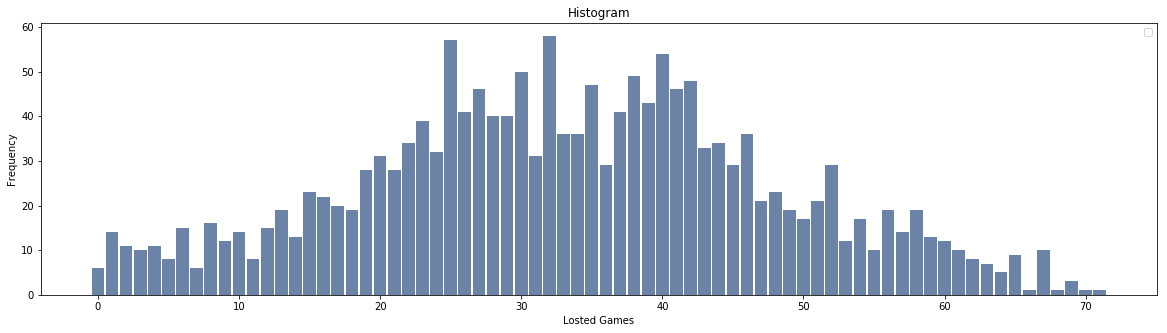

In [22]:
import thinkstats2, thinkplot
#visualizing frequencies of number of losted games
coaches_hist = thinkstats2.Hist(coaches_data.lost)
thinkplot.Hist(coaches_hist)
thinkplot.Config(title="Histogram", xlabel="Losted Games", ylabel="Frequency")

No handles with labels found to put in legend.


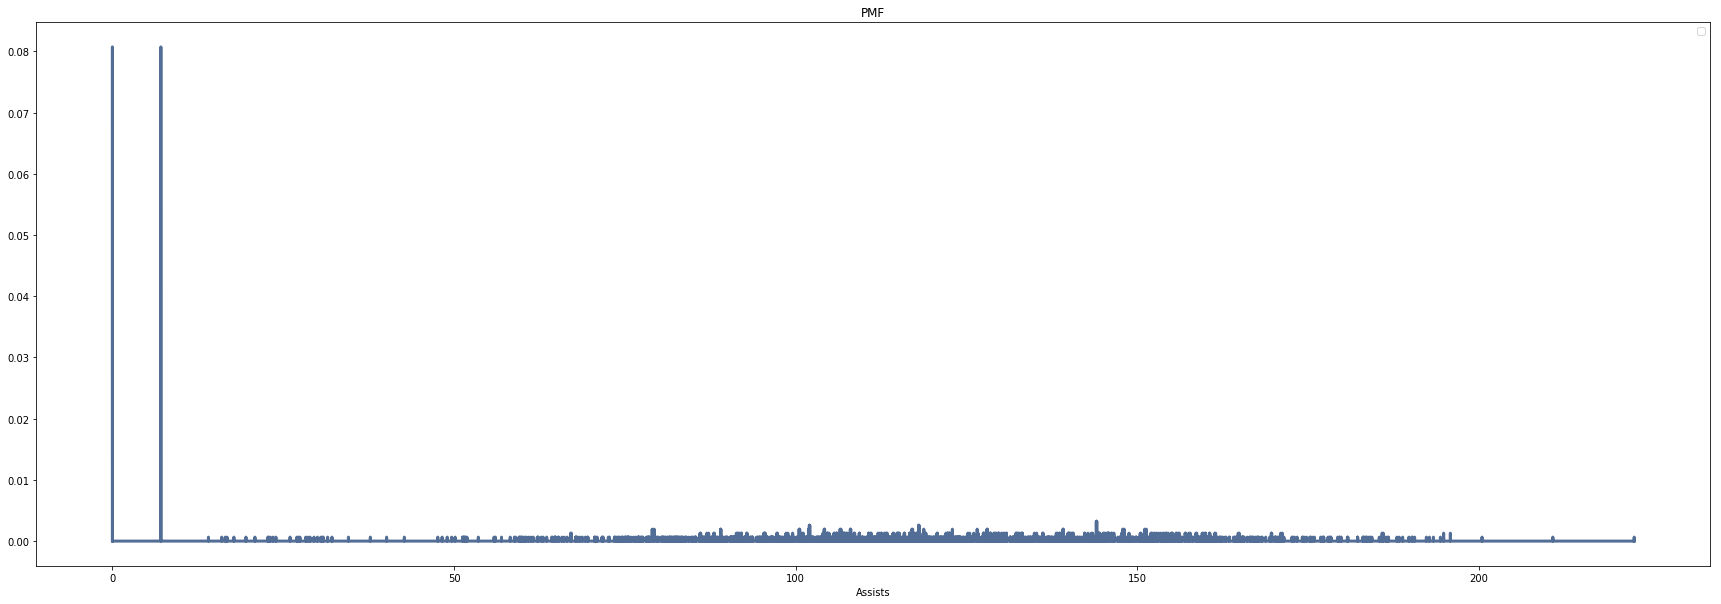

In [42]:
#visualizing PMF of means of assists which are scored by players
pmf_assists = thinkstats2.Pmf(assists_data.assists)
pylab.rcParams["figure.figsize"] = (30, 10)
thinkplot.Pmf(pmf_assists)
thinkplot.Config(title="PMF", xlabel="Assists")

No handles with labels found to put in legend.


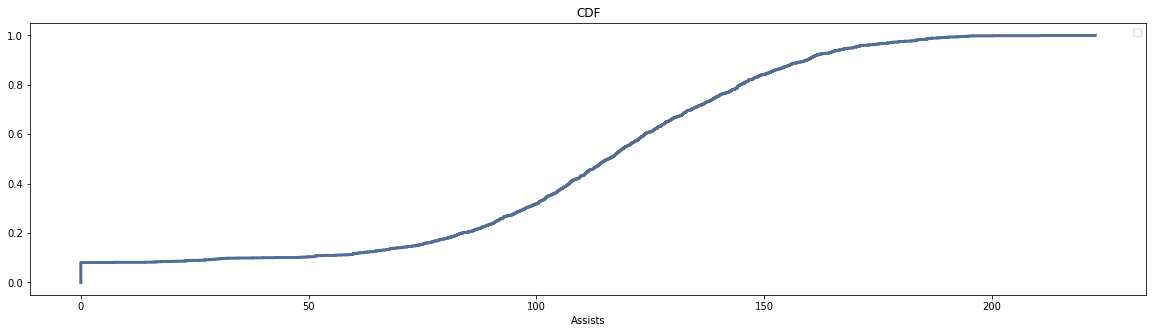

In [43]:
#visualizing CDF of means of assists which are scored by players
cdf_assists = thinkstats2.Cdf(assists_data.assists)
pylab.rcParams["figure.figsize"] = (20, 5)
thinkplot.Cdf(cdf_assists)
thinkplot.Config(title="CDF", xlabel="Assists")

#### Section 4

In [44]:
#calculating R-squared and p-value by using losted games assists scored variables (dependent ~ explanatory)
import statsmodels.formula.api as smf
formula = "lost ~ assists"
modelling = smf.ols(formula, data=merged_data)
result = modelling.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lost   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     22.29
Date:                Sun, 03 Jun 2018   Prob (F-statistic):           2.54e-06
Time:                        22:27:39   Log-Likelihood:                -6889.6
No. Observations:                1680   AIC:                         1.378e+04
Df Residuals:                    1678   BIC:                         1.379e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7144      1.233     22.476      0.000      25.296      30.133
assists        0.0483      0.010      4.721      0.000       0.028       0.068
==============================================================================
Omnibus:                       18.677   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.253
Skew:                           0.097   Prob(JB):                      0.00132
Kurtosis:                       2.611   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is 1.3%. Due to the fact that it is greater than 1% threshold, it means that line fits data.

#### Section 5

In [17]:
#calculating correlation of losted games and assists scores variables
cols = merged_data[["lost", "assists"]]
cols.corr()

,lost,assists
lost,1.000000,0.114497
assists,0.114497,1.000000


#### Section 6

I calculate the means of merged and assists data

In [18]:
merged_data_mean=merged_data["assists"].mean()
merged_data_mean

114.98199125993246

In [19]:
assists_data_mean=assists_data["assists"].mean()
assists_data_mean

109.3757147892138

In [20]:
#calculating the difference of means
abs(assists_data_mean - merged_data_mean)

5.6062764707186545

By calculating difference of means of assists and merged datas, i calculate the test statistic for my hypotesis testing

As it can be seen from the summary table above (OLS regression results), p value is smaller than threshold. So it is statistically significance, it does not occur by a chance

#### Section 7

In conclusion, my hypothesis illustrates that the average of the assists by the players are not negatively related to number of games which are losted by coaches in same years.